In [5]:
def findMatchPacketIndex(ip_file, targetIP):
    i = 0
    match = []
    for packet in ip_file.packets:
        try:
            if (packet.packet.payload.src == targetIP or packet.packet.payload.dst == targetIP):
                match.append(i)
            i+=1
        except:
            pass
    return match

## Traffic pattern extraction

In [52]:
def trafficPerSec(raw,ip_layer,match):
    packet_len = []
    timeStamp = [] 
    base = raw.packets[match[0]].timestamp
    for index in match:
        try:
            packet_len.append(ip_layer.packets[index].packet.payload.len)
            timeStamp.append(raw.packets[index].timestamp - base)
        except:
            pass
        
    traffic_rate = {}
    for i in range (0,len(timeStamp)):
        time = timeStamp[i]
        if (time in traffic_rate):
            traffic_rate[time] = traffic_rate.get(time)+packet_len[i]
        else:
            traffic_rate[time] = packet_len[i]
    
    timeStamp_sec = []
    traffic_rate_perSec = []
    for entry in traffic_rate:
        traffic_rate_perSec.append(traffic_rate[entry])
        timeStamp_sec.append(entry)
    
    return packet_len, timeStamp, traffic_rate_perSec,timeStamp_sec

In [64]:
def loadFile(file1):
    testcap = open(file1, 'rb')
    raw = savefile.load_savefile(testcap, verbose=True)
    testcap.close()

    testcap = open(file1, 'rb')
    ip_layer = savefile.load_savefile(testcap, layers=2, verbose=True)
    testcap.close()
    return raw, ip_layer

## 2.1 Light-bulb

In [130]:
filePath="C:\\Users\\szell\\uva\\2021Spring\\network\\finalProject\\mypcap\\"
file1 = filePath+'colorBulb_experinment1.pcap'
raw, ip_layer = loadFile(file1)
match = findMatchPacketIndex(ip_layer,b'192.168.137.167')
packet_len, timeStamp, traffic_rate_perSec,x = trafficPerSec(raw,ip_layer,match)

[+] attempting to load C:\Users\szell\uva\2021Spring\network\finalProject\mypcap\colorBulb_experinment1.pcap
[+] found valid header
[+] loaded 237 packets
[+] finished loading savefile.
[+] attempting to load C:\Users\szell\uva\2021Spring\network\finalProject\mypcap\colorBulb_experinment1.pcap
[+] found valid header
[+] loaded 237 packets
[+] finished loading savefile.


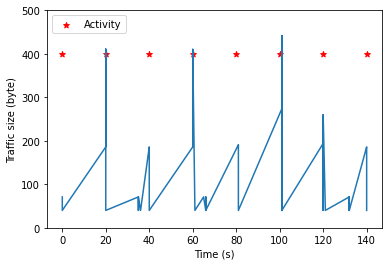

In [133]:
fig = plt.figure()
plt.plot(timeStamp, packet_len)
activity_time = [0,20,40,60,80,100,120,140]
plt.scatter(activity_time, [400]*8,marker="*",color='red', label='Activity')
plt.xlabel('Time (s)')
plt.ylabel('Traffic size (byte)')
plt.ylim([0, 500])
plt.legend(loc="upper left")
plt.show()
fig.savefig('.//finalProject//traffic_pattern_plot//bulb_traffic_size.jpg')

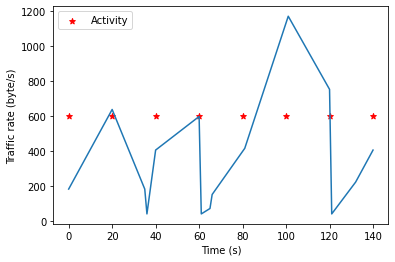

In [134]:
fig = plt.figure()
plt.plot(x, traffic_rate_perSec)
activity_time = [0,20,40,60,80,100,120,140]
plt.scatter(activity_time, [600]*8,marker="*",color='red',label='Activity')
plt.xlabel('Time (s)')
plt.ylabel('Traffic rate (byte/s)')
plt.legend(loc="upper left")
plt.show()
fig.savefig('.//finalProject//traffic_pattern_plot//bulb_traffic_rate.jpg')

## 2.2 Google speaker

In [102]:
# match = findMatchPacketIndex(ip_layer,b'192.168.137.44')
filePath="C:\\Users\\szell\\uva\\2021Spring\\network\\finalProject\\mypcap\\"
file1 = filePath+'askGoogle3.pcap'
raw, ip_layer = loadFile(file1)
match = findMatchPacketIndex(ip_layer,b'192.168.137.44')
packet_len, timeStamp, traffic_rate_perSec,x = trafficPerSec(raw,ip_layer,match)

[+] attempting to load C:\Users\szell\uva\2021Spring\network\finalProject\mypcap\askGoogle3.pcap
[+] found valid header
[+] loaded 8960 packets
[+] finished loading savefile.
[+] attempting to load C:\Users\szell\uva\2021Spring\network\finalProject\mypcap\askGoogle3.pcap
[+] found valid header
[+] loaded 8960 packets
[+] finished loading savefile.


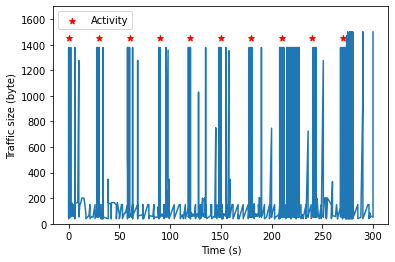

In [128]:
fig = plt.figure()
plt.plot(timeStamp, packet_len)
plt.xlabel('Time (s)')
plt.ylabel('Traffic size (byte)')
plt.ylim([0, 1700])
activity_time = [0,30,60,90,120,150,180,210,240,270]
plt.scatter(activity_time, [1450]*10,marker="*",color='red',label='Activity')
plt.legend(loc="upper left")
plt.show()
fig.savefig('.//finalProject//traffic_pattern_plot//speaker_traffic_size.jpg')

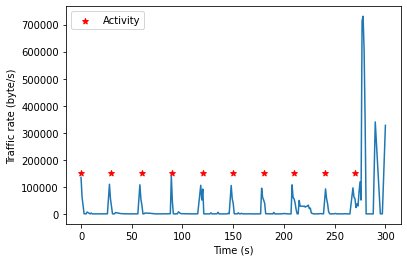

In [117]:
fig = plt.figure()
plt.plot(x, traffic_rate_perSec)
plt.xlabel('Time (s)')
plt.ylabel('Traffic rate (byte/s)')
activity_time = [0,30,60,90,120,150,180,210,240,270]
plt.scatter(activity_time, [150000]*10,marker="*",color='red',label='Activity')
plt.legend(loc="upper left")
plt.show()
fig.savefig('.//finalProject//traffic_pattern_plot//speaker_traffic_rate.jpg')